# Sample scripts accompanying "Comprehensive computational analysis of epigenetic descriptors affecting CRISPR-Cas9 off-target activity"

## Setup and Installation

In [ ]:
#@title Set Folder Prefix

##########################################
######## EDIT AND RUN THIS FIRST #########
##########################################

# Set this to the folder where the python scripts and IPython notebooks
# are located
folder_prefix = '/content/drive/MyDrive/nuc_occup/sample_script/'

In [ ]:
#@title Upgrade XGBoost
!pip install xgboost --upgrade # the code works on xgboost >=1.6.2
# RESTART THE RUNTIME IF XGBOOST HAS UPGRADED

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 41 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## Sample Scripts for XGBoost model

### 1. Example Usage of XGBoost model
Corresponds to xgb_predict_one.py

In [ ]:
import pandas as pd
import xgboost as xgb

# This Python script uses the following data and model files:
# 1. An example input CSV file with one row, namely one CRISPR-Cas9 cleavage
#    activity datapoint from the crisprSQL dataset in the paper
example_loc = folder_prefix + 'data/example_input.csv'
# 2. The XGBoost tree model used for making CRISPR-Cas9 cleavage activity
#    prediction
xgb_loc = folder_prefix + 'models/xgb_model.json'

# Create and load the XGBoost model
# Use XGBRegressor since CRISPR-Cas9 cleavage activity values are continuous
xgb_model = xgb.XGBRegressor()
xgb_model.load_model(xgb_loc)

# Read the input CSV file
example_df = pd.read_csv(example_loc)

# Make the prediction
pred = xgb_model.predict(example_df.astype('float'))

# Print the result
# -1.054 is the predicted CRISPR-Cas9 cleavage activity value
print('Predicted CRISPR-Cas9 Cleavage Activity: {:.3f}'.format(pred[0]))

Predicted CRISPR-Cas9 Cleavage Activity: -1.054


### 2. Use XGBoost model to predict CRISPR cleavage activity for 2000 randomly selected points from the  crisprSQL dataset
Corresponds to xgb_predict.py

In [ ]:
import pandas as pd
import xgboost as xgb

# This Python script uses the following data and model files:
# 1. An input CSV file containing 2000 random experimental/augmented
#    CRISPR-Cas9 cleavage activity datapoints from the crisprSQL dataset
#    in the paper
csv_loc = folder_prefix + 'data/crisprSQL_dataset_2000.csv'
# 2. The XGBoost tree model used for making CRISPR-Cas9 cleavage activity
#    prediction
xgb_loc = folder_prefix + 'models/xgb_model.json'

# We will save the predictions in the "out" folder
out_loc = folder_prefix + 'out/xgb_preds.csv'

# Create and load the XGBoost model
# Use XGBRegressor since CRISPR-Cas9 cleavage activity values are continuous
xgb_model = xgb.XGBRegressor()
xgb_model.load_model(xgb_loc)

# Read the input CSV file
X_df = pd.read_csv(csv_loc)

# Make predictions
preds = xgb_model.predict(X_df)

# Save the predictions
pd.DataFrame(preds).to_csv(out_loc, index=None)

# Print results
# Predicted CRISPR-Cas9 Cleavage Activities: [-1.0535808 -3.4915433 -1.7820611 ...
# -0.7105575 -1.2672865 -4.081657 ]
print('Predicted CRISPR-Cas9 Cleavage Activities: ' + str(preds))
print('Read the full list of predictions at ' + out_loc)

Predicted CRISPR-Cas9 Cleavage Activities: [-1.0535808 -3.4915433 -1.7820611 ... -0.7105575 -1.2672865 -4.081657 ]
Read the full list of predictions at /content/drive/MyDrive/nuc_occup/sample_script/out/xgb_preds.csv


### 3. Varying Nucleotide BDM, GC147 and NuPoP (Affinity) values in XGBoost model
Corresponds to xgb_vary.py

Nucleotide BDM's value ranges from 172.66 to 480.48


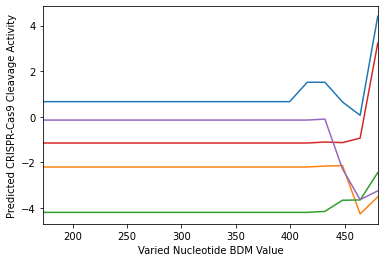

GC147's value ranges from 0.25 to 0.86


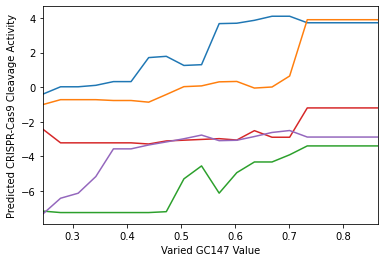

NuPoP (Affinity)'s value ranges from 0.50 to 2.13


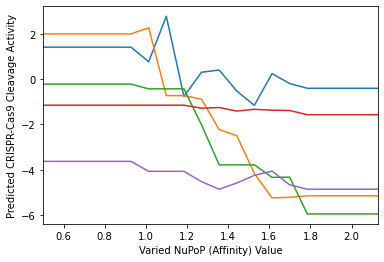

In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# In the paper, we identified Nucleotide BDM, GC147 and NuPoP (Affinity) as
# important computed nucleosome organization-related scores. Thus, in this
# Python script, we vary the values of these scores, and see how such varied
# values affect XGBoost's predictions.

# This Python script uses the following data and model files:
# 1. An input CSV file containing 2000 random experimental/augmented datapoints
#    from the crisprSQL dataset in the paper
csv_loc = folder_prefix + 'data/crisprSQL_dataset_2000.csv'
# 2. The XGBoost tree model used for making CRISPR-Cas9 cleavage activity
#    prediction
xgb_loc = folder_prefix + 'models/xgb_model.json'

# The plots generated will be saved in these relative locations
out_dict = {'Nucleotide BDM': 'out/xgb_vary_nucleotide_bdm.pdf',
            'GC147': 'out/xgb_vary_gc147.pdf',
            'NuPoP (Affinity)': 'out/xgb_vary_nupop_affinity.pdf'}

### IMPORTANT CONSTANTS ### 
# Don't change these!
TAR_SEQ_LEN = 23 # target DNA sequence's length

# Feel free to change these
NUM_SAMPLES = 5 # Number of random datapoints to select for visualization,
                 # i.e., number of row to select from the input CSV file
NUM_VARIED = 20 # Number of varied points per random datapoint
###########################

# Read the input CSV file
X_df = pd.read_csv(csv_loc)

# Create and load the XGBoost model
# Use XGBRegressor since CRISPR-Cas9 cleavage activity values are continuous
xgb_model = xgb.XGBRegressor()
xgb_model.load_model(xgb_loc)

# These are the column/feature names corresponding to ...
# (a) Nucleotide BDM
NBDM_feats = ['NucleotideBDM_' + str(i) for i in range(1, 1 + TAR_SEQ_LEN)]
# (b) GC147
GC_feats = ['GCContent_' + str(i) for i in range(1, 1 + TAR_SEQ_LEN)]
# (c) NuPoP (Affinity)
NuPoP_Aff_feats = ['NuPoP_Affinity_147_h'] + \
            ['NuPoP_Affinity_147_h.' + str(i) for i in range(1, TAR_SEQ_LEN)]
# Put these features into a dictionary
feats_dict = {'Nucleotide BDM': NBDM_feats,
              'GC147': GC_feats,
              'NuPoP (Affinity)': NuPoP_Aff_feats}

# To obtain sensible value ranges, we exclude data points with zeros across
# all computed nucleosome organization-related score, since these zeros arise
# from data imputation during training.
non_zero_X_df = X_df[X_df['GCContent_1'] > 0]

# Set values ranges for each computed score to be within the minimum and
# maximum value of the respective features, i.e., we vary within the ranges
# of the dataset.
ranges_dict = {'Nucleotide BDM': (non_zero_X_df[NBDM_feats].min(axis=1).min(),
                                  non_zero_X_df[NBDM_feats].max(axis=1).max()),
              'GC147': (non_zero_X_df[GC_feats].min(axis=1).min(),
                        non_zero_X_df[GC_feats].max(axis=1).max()),
              'NuPoP (Affinity)': (non_zero_X_df[NuPoP_Aff_feats].min(axis=1).min(),
                                   non_zero_X_df[NuPoP_Aff_feats].max(axis=1).max())}

# We select NUM_SAMPLES random data points...
X_sample = X_df.sample(NUM_SAMPLES)

# Generate plots for each of the three computed scores
for feat_name, feats in feats_dict.items():
  min_val, max_val = ranges_dict[feat_name]
  print("{}'s value ranges from {:.2f} to {:.2f}".format(feat_name,
                                                         min_val, max_val))

  # For each data point...
  for i in range(NUM_SAMPLES):
    point_chosen = X_sample.iloc[i]

    # Create a Pandas dataframe for the random datapoint
    example_df = pd.DataFrame(point_chosen).transpose()

    # Determine the varied values to change to
    varied_vals = np.linspace(min_val, max_val, NUM_VARIED)

    # Create the artificial datapoints containing the varied values
    vary_df = example_df.loc[example_df.index.repeat(len(varied_vals))]
    for feat in feats:
      vary_df[feat] = varied_vals

    # Make predictions for these artificial datapoints
    preds = xgb_model.predict(vary_df)

    # Plot the line
    plt.plot(varied_vals, preds)

  # Set...
  # the plot's minimum and maximum x-value, ...
  plt.xlim(min_val, max_val)
  # the x-axis's name, and
  plt.xlabel("Varied {} Value".format(feat_name))
  # the y-axis's name
  plt.ylabel("Predicted CRISPR-Cas9 Cleavage Activity")

  # Save the plot
  plt.savefig(folder_prefix + out_dict[feat_name])

  # This is an IPython notebook, so let's show the figures when running
  # this cell
  plt.show()

  # Close the current figure
  plt.close()
 
# The script prints:
# Nucleotide BDM's value ranges from 172.66 to 480.48
# GC147's value ranges from 0.25 to 0.86
# NuPoP (Affinity)'s value ranges from 0.50 to 2.13

# We observe the following tendencies in the plots:
#   - low Nucleotide BDM value corresponds to low predicted CRISPR-Cas9 cleavage
#     activity value
#   - increasing GC147 increases predicted CRISPR-Cas9 cleavage activity value
#   - high NuPoP (Affinity) value corresponds to low predicted CRISPR-Cas9
#     cleavage activity value

## Sample Scripts for convolutional neural network (CNN) model

### 0. PyTorch CNN model architecture

RUN THIS BEFORE ANY OF THE CODE BELOW

Corresponds to cnn.py

In [28]:
import torch
import pickle
import pandas as pd
import numpy as np

### IMPORTANT CONSTANTS ###
tarSeqLen = 23 # target DNA sequence's length
###########################

class GaussianNoise(torch.nn.Module):
  ''' Custom module to implement Gaussian random noise
  in nn.Sequential containers.

  Attributes:
    mean: Float indicating the Gaussian noise's mean.
    stdev: Float indicating the Gaussian noise's standard deviation.
  '''
  def __init__(self, mean, stdev):
    ''' Initializes GaussianNoise with mean and standard deviation.
    Input:
      mean: Float indicating the Gaussian noise's mean.
      stdev: Float indicating the Gaussian noise's standard deviation.
    Output:
      None
    '''
    super(GaussianNoise, self).__init__()
    self.mean = mean
    self.stdev = stdev

  def forward(self, ins):
    ''' Forward pass in layer. Only adds noise during training. '''
    if self.training:
      noise = ins.data.new(ins.size()).normal_(self.mean, self.stdev)
      return ins + noise
    return ins

class ConvolutionalNet(torch.nn.Module):
  ''' PyTorch convolutional neural network (CNN) regression model used for
  predicting CRISPR-Cas9 (off-)target activity values.

  Non-layer attributes:
    device: The compute device used for tensor computations (e.g., cpu, gpu).
    p: Dropout probability used in EncodeLayer1's nn.Dropout layer.
    mean: Mean used in EncodeLayer1's GaussianNoise layer.
    stdev: Standard deviation used in EncodeLayer1's GaussianNoise layer.
    batchnorm_momentum: Momentum of BatchNorm's running estimates.
    epiDim: Number of epigenetic features (always 22).
  
  Layer attributes:
    BatchNorm: 1D BatchNorm layer.
    EncodeLayer1: nn.Sequential block consisting of a Conv1d,
                  GaussianNoise, Dropout and then a LeakyReLU layer.
    EncodeLayer2: nn.Sequential block consisting of a Conv1d
                  and then a LeakyReLU.
    EncodeLayer3: nn.Sequential block consisting of a Conv1d, BatchNorm
                  and then a LeakyReLU.
    ConjoinedLayer1: nn.Sequential block consisting of a Conv1d, MaxPool1d
                  and then a ReLU.
    ConjoinedLayer2: nn.Sequential block consisting of a Conv1d, MaxPool1d
                  and then a ReLU.
    conjoinedLinear: nn.Linear layer.
  '''
  
  def __init__(self, epiDim, device=None,
               p = 0.0, mean = 0, stdev = 0.254, batchnorm_momentum = 0.1):
    ''' Initializes ConvolutionalNet with training parameters
    and neural net layers

    Input:
      epiDim: Number of epigenetic features (always 22).
      device: The compute device used for tensor computations
              (e.g., cpu, gpu).
      p: Dropout probability used in EncodeLayer1's nn.Dropout layer.
      mean: Mean used in EncodeLayer1's GaussianNoise layer.
      stdev: Standard deviation used in EncodeLayer1's GaussianNoise layer.
      batchnorm_momentum: Momentum of BatchNorm's running estimates.
    
    Output:
      None
    '''
    super(ConvolutionalNet, self).__init__()
    self.device = device
    self.p, self.mean, self.stdev = p, mean, stdev
    self.batchnorm_momentum = batchnorm_momentum
    self.epiDim = epiDim
    self.BatchNorm = torch.nn.BatchNorm1d(self.epiDim,
                                          momentum=self.batchnorm_momentum)
    self.BatchNorm.to(self.device)

    # Encode Layers
    # don't set batchnorm_momentum as this will probably mess up
    # the running stats
    self.EncodeLayer1 = torch.nn.Sequential(
      torch.nn.Conv1d(int(self.epiDim), 32, kernel_size=3, stride=2,
                      padding=0),
      GaussianNoise(self.mean, self.stdev), # set Gaussian mean and stdev
      torch.nn.Dropout(p=self.p), # set dropout p
      torch.nn.LeakyReLU(0.2)
      )
    self.EncodeLayer1.to(self.device)

    self.EncodeLayer2 = torch.nn.Sequential(
      torch.nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0),
      torch.nn.LeakyReLU(0.2)
      )
    self.EncodeLayer2.to(self.device)


    self.EncodeLayer3 = torch.nn.Sequential(
      torch.nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=0),
      torch.nn.BatchNorm1d(128),
      torch.nn.LeakyReLU(0.2)
      )
    self.EncodeLayer3.to(self.device)

    # Conjoined Layers
    self.conjoinedLayer1 = torch.nn.Sequential(
      torch.nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=0),
      torch.nn.MaxPool1d(kernel_size=3, padding=1, stride=1), # preserve
                                                              # dimensions
      torch.nn.ReLU()
      )
    self.conjoinedLayer1.to(self.device)

    self.conjoinedLayer2 = torch.nn.Sequential(
      torch.nn.Conv1d(256, 512, kernel_size=2, stride=1, padding=0),
      torch.nn.MaxPool1d(kernel_size=3, padding=1, stride=1),
      torch.nn.ReLU()
      )
    self.conjoinedLayer2.to(self.device)

    self.conjoinedLinear = torch.nn.Linear(512, 1)
    self.conjoinedLinear.to(self.device)

  def forward(self, x):
    ''' Performs a forward pass using the instantiated ConvolutionalNet
    model.

    Input:
      x: PyTorch tensor as input to the ConvolutionalNet model.
         The tensor contains the 22 epigenetic features.
         Dimension: (X.shape[0], epiDim, tarSeqLen), where
           - X.shape[0]         is the # of datapoints,
           - epiDim (== 22)     is the # of epigenetic features 
           - tarSeqLen (== 23)  is the target sequence's length.

    Output:
      out: PyTorch tensor containing predicted CRISPR-Cas9 (off-)target
           cleavage activity values.
    '''
    x = x.view(x.size(0), self.epiDim, -1).to(self.device)
    x = self.BatchNorm(x)

    # forward pass thru encode layers
    x_enc = self.EncodeLayer1(x)
    x_enc = self.EncodeLayer2(x_enc)
    seq_encoding = self.EncodeLayer3(x_enc)

    # forward pass thru conjoined layers
    out = self.conjoinedLayer1(seq_encoding)
    out = self.conjoinedLayer2(out)

    # flatten last axis to 512 x 1
    out = out.reshape(out.size(0), -1)
    
    # forward pass thru linear layer
    out = self.conjoinedLinear(out)
    return out # regression

def vecToMatEncoding(X, numBpWise=0):
  ''' Formats the epigenetic feature-containing PyTorch tensor so that it
      is ready as input to the ConvolutionalNet model.
  
      To do this, we first transpose the first numBpWise*tarSeqLen columns
      in PyTorch Tensor X. These columns come in sets of tarSeqLen, where
      each set corresponds to a base pair-resolved computed nucleosome
      organization score. Then, for the remaining columns in X, we repeat
      each column tarSeqLen times. Finally, we concatenate the two tensors
      together to form the output. Here is a conceptual visualization of how
      this function transforms each column in X

      bp-resolved column features: a, b, ..., m (there are 13 of these)
      non-bp-resolved column features: n, o,..., v (there are 9 of these)
                | vecToMatEncoding
                |
                v
      X (size 308)     : [aa...abb...b...mm...mno...v]
      output (size 22 x 23): [[a...a], [b...b], ..., [m...m],
                              [n...n], [o...o], ..., [v...v],]

  Input:
    X: 2D PyTorch tensor. Each row represents a datapoint, and
       each column represents an epigenetic feature
       Dimension: (# of datapoints, 308), where
       308 = numBpWise * tarSeqLen
             + (# of non-bp-resolved (energy/experimental) epigenetic scores)
           = 13 * 23 + 9
    numBpWise: Number of base pair-resolved nucleosome organization-related
               scores/features (always 13).
  
  Output:
    PyTorch tensor ready for forward pass.
    Dimension: (X.shape[0], epiDim, tarSeqLen), where
      - X.shape[0]         is the # of datapoints,
      - epiDim (== 22)     is the # of epigenetic features 
      - tarSeqLen (== 23)  is the target sequence's length.
  '''
  
  bpwise_features = []
  for i in range(numBpWise):
    # we format each base pair-wise feature to have
    # dimension (X.shape[0], 1, tarSeqLen)
    bpwise_features.append(X[:, i*tarSeqLen:(i+1)*tarSeqLen] \
                    .view(X.shape[0], tarSeqLen, 1) \
                    .transpose(1,2))

  # None indexing means adding an axis - could also use .unsqueeze() here
  epigenetics = X[:, numBpWise*tarSeqLen:, None].repeat(1, 1, tarSeqLen)

  # return epigenetics and bpwise_features
  return torch.cat(tuple(bpwise_features)+(epigenetics,), dim=1)

### 1. Example Usage of the PyTorch CNN model
Corresponds to cnn_predict_one.py

In [29]:
import pandas as pd
import torch

# This Python script uses the following data and model files:
# 1. An example input CSV file with one row, namely one datapoint
# from the crisprSQL dataset in the paper
example_loc = folder_prefix + 'data/example_input.csv'
# 2. PyTorch model file containing the convolutional neural network (CNN) model
#    which predicts CRISPR-Cas9 (off-)target cleavage activity.
state_dict_loc = folder_prefix + 'models/cnn_model.pt'

### IMPORTANT CONSTANTS ###
numBpWise = 13 # Number of base pair-resolved computed
               # nucleosome organization-related scores/features
epiDim = 22 # The total number of epigenetic features considered
###########################

# Read in the crisprSQL data points
X_df = pd.read_csv(example_loc)

# Convert the Pandas DataFrame into a PyTorch tensor
X_torch = torch.as_tensor(X_df.to_numpy()).float()

# Decide which compute device to use when using PyTorch.
# Use a GPU if available, CPU otherwise.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create convolutional neural network regression PyTorch model
torch_model = ConvolutionalNet(epiDim, device=device)

# Load saved PyTorch weights
state_dict = torch.load(state_dict_loc, map_location=device)
torch_model.load_state_dict(state_dict)

# Format the PyTorch tensor to fit the CNN's input dimensions
x = vecToMatEncoding(X_torch, numBpWise=numBpWise)

# Prepare for model inference by setting torch_model to evaluation mode 
torch_model.eval()

# Predict the CRISPR-Cas9 cleavage activity
pred = torch_model(x).cpu().flatten().detach().numpy()

# Print results
print('Predicted CRISPR-Cas9 Cleavage Activity: {:.3f}'.format(pred[0]))
# on CPU/GPU: -0.669

Predicted CRISPR-Cas9 Cleavage Activity: -0.669


### 2. Use PyTorch CNN model to predict CRISPR activity for 2000 randomly selected points from the crisprSQL dataset
Corresponds to cnn_predict.py

In [30]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# This Python script uses the following data and model files:
# 1. An input CSV file containing 2000 random experimental/augmented datapoints
#    from the crisprSQL dataset in the paper
input_feat_loc = folder_prefix + 'data/crisprSQL_dataset_2000.csv'
# 2. PyTorch model file containing the convolutional neural network (CNN) model
#    which predicts CRISPR-Cas9 (off-)target cleavage activity.
state_dict_loc = folder_prefix + 'models/cnn_model.pt'

# We will save the predictions in the "out" folder
out_loc = folder_prefix + 'out/cnn_preds.csv'

### IMPORTANT CONSTANTS ###
numBpWise = 13 # Number of base pair-resolved computed
               # nucleosome organization-related scores/features
epiDim = 22 # The total number of epigenetic features considered
###########################

# Read in the crisprSQL data points
X_df = pd.read_csv(input_feat_loc)

# Convert the Pandas DataFrame into a PyTorch tensor
X_torch = torch.as_tensor(X_df.to_numpy()).float()

# Decide which compute device to use when using PyTorch.
# Use a GPU if available, CPU otherwise.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create convolutional neural network regression PyTorch model
torch_model = ConvolutionalNet(epiDim, device=device)

# Load saved PyTorch weights
state_dict = torch.load(state_dict_loc, map_location=device)
torch_model.load_state_dict(state_dict)

# Format the PyTorch tensor to fit the CNN's input dimensions
x = vecToMatEncoding(X_torch, numBpWise=numBpWise)

# Prepare for model inference by setting torch_model to evaluation mode 
torch_model.eval()

# Predict CRISPR-Cas9 cleavage activities
preds_y = torch_model(x).cpu().flatten().detach().numpy()

# Save the predictions
pd.DataFrame(preds_y).to_csv(out_loc)

# Print results
print('Predicted CRISPR-Cas9 Cleavage Activities:', preds_y)
# Result varies due to floating point precision arithmetic
# Example outputs:
# on CPU: [-0.669225   -4.1682196  -1.7856159  ... -0.58595717 -0.97370046
# -4.1463737 ]
# on GPU: [-0.6692251  -4.1682186  -1.7856162  ... -0.58595747 -0.9737008
# -4.1463733 ]

Predicted CRISPR-Cas9 Cleavage Activities: [-0.669225   -4.1682196  -1.7856159  ... -0.58595705 -0.9737004
 -4.1463737 ]


### 3. Varying Nucleotide BDM, GC147 and NuPoP (Affinity) values in PyTorch CNN model
Corresponds to cnn_vary.py

Nucleotide BDM's value ranges from 172.66 to 480.48


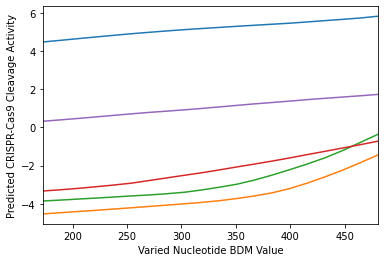

GC147's value ranges from 0.25 to 0.86


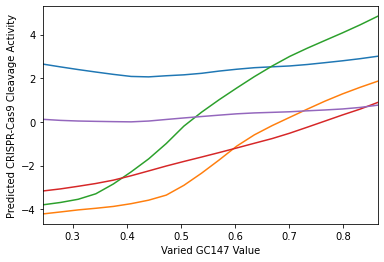

NuPoP (Affinity)'s value ranges from 0.50 to 2.13


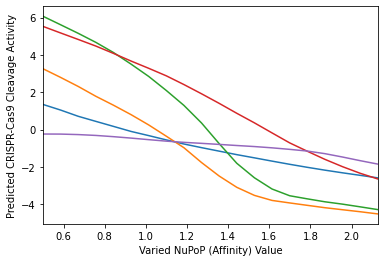

NameError: ignored

In [27]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# Nucleotide BDM, GC147 and NuPoP (Affinity) are identified as important
# computed nucleosome organization-related scores. Thus, in this Python script,
# we vary the values of these scores, and see how such varied values
# affect XGBoost's predictions.

# This Python script uses the following data and model files:
# 1. An input CSV file containing 2000 random experimental/augmented datapoints
#    from the crisprSQL dataset in the paper
csv_loc = folder_prefix + 'data/crisprSQL_dataset_2000.csv'
# 2. PyTorch model file containing the convolutional neural network (CNN) model
#    which predicts CRISPR-Cas9 (off-)target cleavage activity.
state_dict_loc = folder_prefix + 'models/cnn_model.pt'

# The plots generated will be saved in these relative locations
out_dict = {'Nucleotide BDM': 'out/cnn_vary_nucleotide_bdm.pdf',
            'GC147': 'out/cnn_vary_gc147.pdf',
            'NuPoP (Affinity)': 'out/cnn_vary_nupop_affinity.pdf'}

### IMPORTANT CONSTANTS ### 
# Don't change these!
TAR_SEQ_LEN = 23 # target DNA sequence's length
epiDim = 22 # The total number of epigenetic features considered
numBpWise = 13 # Number of base pair-resolved nucleosome organization-related
               # scores/features

# Feel free to change
NUM_SAMPLES = 5 # Number of random datapoints to select for visualization,
                 # i.e., number of row to select from the input CSV file
NUM_VARIED = 20 # Number of varied points per random datapoint
###########################

# Read the input CSV file
X_df = pd.read_csv(csv_loc)

# Decide which compute device to use when using PyTorch.
# Use a GPU if available, CPU otherwise.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create convolutional neural network regression PyTorch model
torch_model = ConvolutionalNet(epiDim, device=device)

# Load saved PyTorch weights
state_dict = torch.load(state_dict_loc, map_location=device)
torch_model.load_state_dict(state_dict)

# These are the column/feature names corresponding to ...
# (a) Nucleotide BDM
NBDM_feats = ['NucleotideBDM_' + str(i) for i in range(1, 1 + TAR_SEQ_LEN)]
# (b) GC147
GC_feats = ['GCContent_' + str(i) for i in range(1, 1 + TAR_SEQ_LEN)]
# (c) NuPoP (Affinity)
NuPoP_Aff_feats = ['NuPoP_Affinity_147_h'] + \
                  ['NuPoP_Affinity_147_h.' + str(i) for i in range(1,
                                                                  TAR_SEQ_LEN)]
# Put these features into a dictionary
feats_dict = {'Nucleotide BDM': NBDM_feats,
              'GC147': GC_feats,
              'NuPoP (Affinity)': NuPoP_Aff_feats}

# To obtain sensible value ranges, we exclude data points with zeros across
# all computed nucleosome organization-related score, since these zeros arise
# from data imputation during training.
non_zero_X_df = X_df[X_df['GCContent_1'] > 0]

# Set values ranges for each computed score to be within the minimum and
# maximum value of the respective features, i.e., we vary within the ranges
# of the dataset.
ranges_dict = {'Nucleotide BDM': (non_zero_X_df[NBDM_feats].min(axis=1).min(),
                                  non_zero_X_df[NBDM_feats].max(axis=1).max()),
              'GC147': (non_zero_X_df[GC_feats].min(axis=1).min(),
                        non_zero_X_df[GC_feats].max(axis=1).max()),
              'NuPoP (Affinity)': (non_zero_X_df[NuPoP_Aff_feats].min(axis=1).min(),
                                   non_zero_X_df[NuPoP_Aff_feats].max(axis=1).max())}

# We select five random data points...
X_sample = X_df.sample(NUM_SAMPLES)

# Generate plots for each of the three computed scores
for feat_name, feats in feats_dict.items():
  min_val, max_val = ranges_dict[feat_name]
  print("{}'s value ranges from {:.2f} to {:.2f}".format(feat_name,
                                                         min_val, max_val))

  # For each data point...
  for i in range(NUM_SAMPLES):
    point_chosen = X_sample.iloc[i]

    # Create a Pandas dataframe for the random datapoint
    example_df = pd.DataFrame(point_chosen).transpose()

    # Determine the varied values to change to
    varied_vals = np.linspace(min_val, max_val, NUM_VARIED)

    # Create the artificial datapoints containing the varied values
    vary_df = example_df.loc[example_df.index.repeat(len(varied_vals))]
    for feat in feats:
      vary_df[feat] = varied_vals

    # # Make predictions for these artificial datapoints
    # preds = xgb_model.predict(vary_df)

    # Convert the Pandas DataFrame into a PyTorch tensor
    X_torch = torch.as_tensor(vary_df.to_numpy()).float()

    # Format the PyTorch tensor to fit the CNN's input dimensions
    x = vecToMatEncoding(X_torch, numBpWise=13)

    # Prepare for model inference by setting torch_model to evaluation mode 
    torch_model.eval()

    # Make CRISPR-Cas9 cleavage activity predictions for these artificial datapoints
    preds = torch_model(x).cpu().flatten().detach().numpy()

    # Plot the line
    plt.plot(varied_vals, preds)

  # Set...
  # the plot's minimum and maximum x-value, ...
  plt.xlim(min_val, max_val)
  # the x-axis's name, and
  plt.xlabel("Varied {} Value".format(feat_name))
  # the y-axis's name
  plt.ylabel("Predicted CRISPR-Cas9 Cleavage Activity")

  # Save the plot
  plt.savefig(folder_prefix + out_dict[feat_name])

  # This is an IPython notebook, so let's show the figures when running
  # this cell
  plt.show()

  # Close the current figure
  plt.close()
 
# The script prints:
# Nucleotide BDM's value ranges from 172.66 to 480.48
# GC147's value ranges from 0.25 to 0.86
# NuPoP (Affinity)'s value ranges from 0.50 to 2.13

# We observe the following tendencies in the plots:
#   - increasing Nucleotide BDM value increases predicted CRISPR-Cas9 cleavage
#     activity value
#   - increasing GC147 increases predicted CRISPR-Cas9 cleavage activity value
#   - increasing NuPoP (Affinity) value decreases predicted CRISPR-Cas9 cleavage
#     activity value

In [ ]:
#